In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../../data/room-temperature.csv')

In [5]:
data.head()

,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4


In [6]:
X = data[["FrontLeft","FrontRight",'BackLeft','BackRight']].values

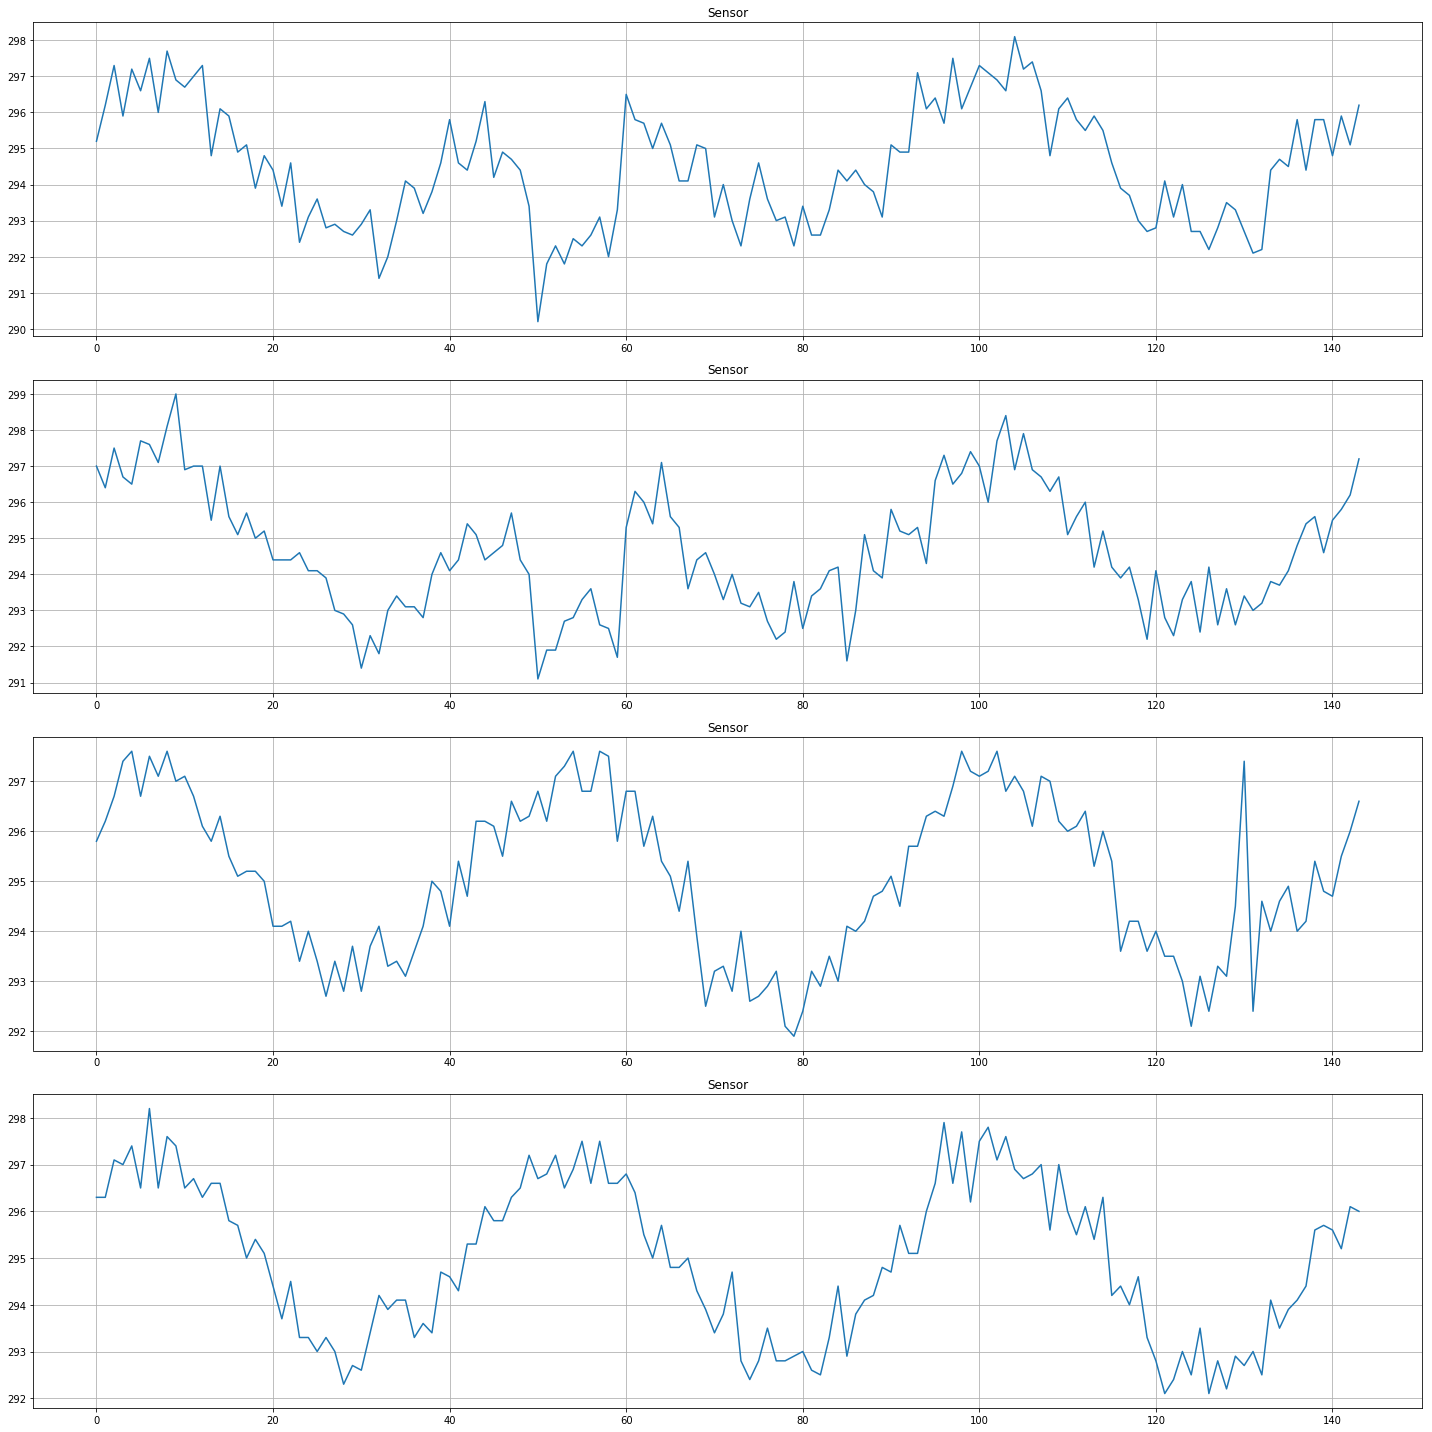

In [7]:
plt.figure(figsize=(20,20))
for i in range(1,5):
    plt.subplot(4,1,i)
    plt.plot(X[:,i-1])
    plt.title('Sensor')
    plt.grid()
    plt.tight_layout()

In [8]:
Xstd = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Xstd)
P=pca.components_
T = Xstd.dot(P.T)

# Squared Prediction Error

<img src="./fig/PCA_SPE.jpg">

SPE using 1 component

In [9]:
Xhat = np.dot(T[:,0].reshape(-1,1),P[0,:].reshape(-1,1).T)
mse = (np.square(Xstd - Xhat)).sum(axis=1)

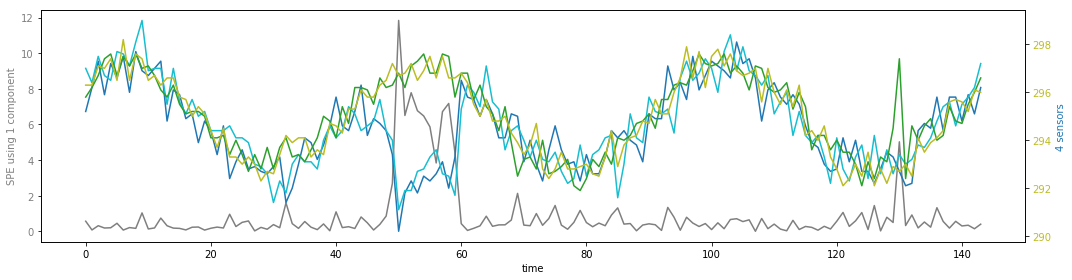

In [10]:
fig, ax1 = plt.subplots()
fig.set_size_inches(15,4)
color = 'tab:gray'
ax1.set_xlabel('time')
ax1.set_ylabel('SPE using 1 component', color=color)
ax1.plot(mse, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('4 sensors', color=color)  # we already handled the x-label with ax1
ax2.plot( X[:,0], color=color)
color = 'tab:cyan'
ax2.plot( X[:,1], color=color)
color = 'tab:green'
ax2.plot( X[:,2], color=color)
color = 'tab:olive'
ax2.plot( X[:,3], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

What happens with the second component

In [17]:
data = pd.read_csv('../../data/tablet-spectra.csv')
data = data.drop(data.columns[0], axis=1)
X=data.values

In [18]:
m,n = X.shape
wl = np.linspace(600,1898,n)

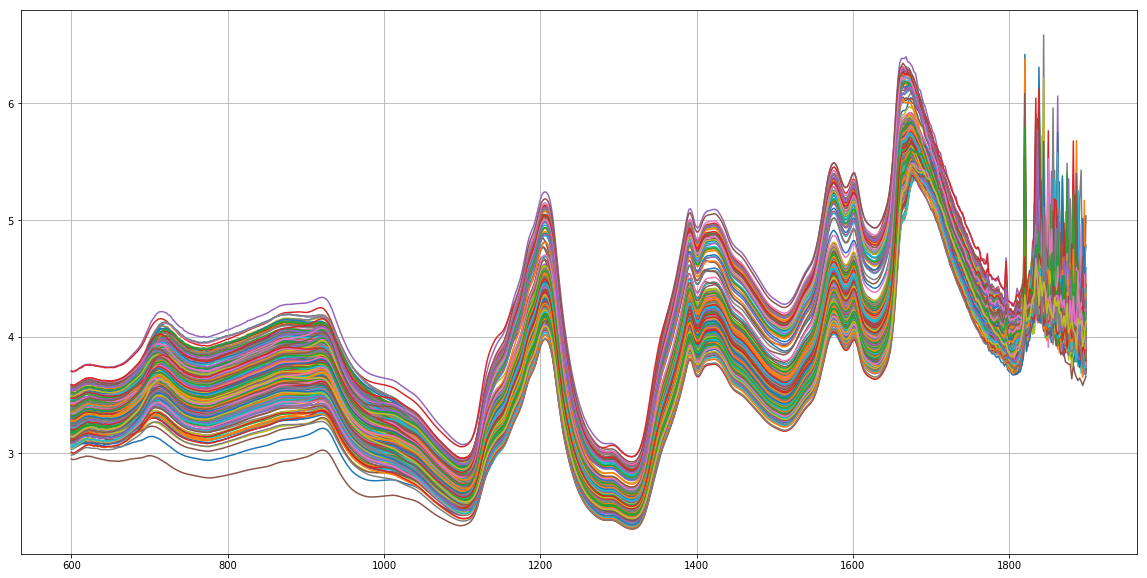

In [19]:
plt.figure(figsize=(20,10))
for i in range(m):
    plt.plot(wl,X[i,:])
plt.grid()

In [20]:
X = data.values
Xstd = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
pca.fit(Xstd)
P=pca.components_
T = Xstd.dot(P.T)

In [21]:
print(pca.explained_variance_ratio_)

[0.73725534 0.18485376 0.01998757 0.01635139 0.00674534 0.00187419
 0.00156637 0.00144928 0.00134626 0.00129714]


In [22]:
Xhat = np.dot(T[:,0].reshape(-1,1),P[0,:].reshape(-1,1).T)
err=Xstd-Xhat
spe1 = (np.square(Xstd - Xhat)).sum(axis=1)
Rsqrd_pc1 = 1-err.std(axis=0,ddof=1)/Xstd.std(axis=0,ddof=1)
Xhat = np.dot(T[:,0:2],P[0:2,:])
err=Xstd-Xhat
spe2 = (np.square(Xstd - Xhat)).sum(axis=1)
Rsqrd_pc2 = 1-err.std(axis=0,ddof=1)/Xstd.std(axis=0,ddof=1)
Xhat = np.dot(T[:,0:3],P[0:3,:])
err=Xstd-Xhat
spe3 = (np.square(Xstd - Xhat)).sum(axis=1)
Rsqrd_pc3 = 1-err.std(axis=0,ddof=1)/Xstd.std(axis=0,ddof=1)
Xhat = np.dot(T[:,0:4],P[0:4,:])
err=Xstd-Xhat
spe4 = (np.square(Xstd - Xhat)).sum(axis=1)
Rsqrd_pc4 = 1-err.std(axis=0,ddof=1)/Xstd.std(axis=0,ddof=1)

# Cumulative proportion values

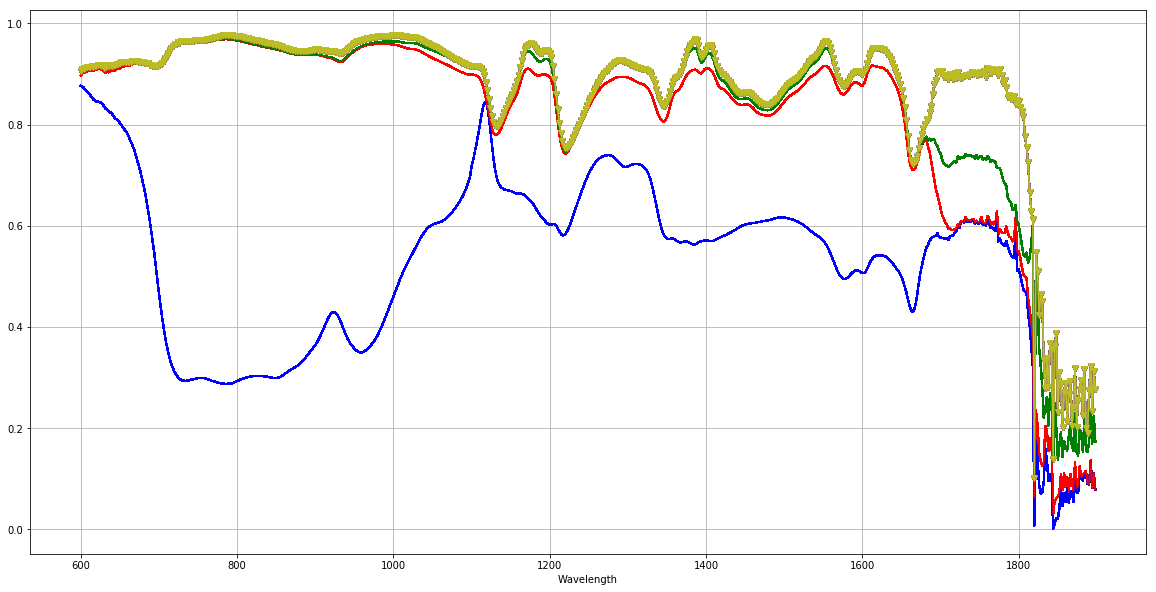

In [23]:
plt.figure(figsize=(20,10))
for i in range(m):
    plt.plot(wl,Rsqrd_pc1,'b-')
    plt.plot(wl,Rsqrd_pc2,'r-')
    plt.plot(wl,Rsqrd_pc3,'g-')
    plt.plot(wl,Rsqrd_pc4,'v-')
plt.xlabel("Wavelength")
plt.grid()

Let’s visually show what the $𝑅^2$ values are for each column. Shown below are these values for the first 3
components. The first component (green, thin line) explains certain regions of the spectra very well,
particularly the region around 1100nm. Wavelengths beyond 1800 nm are not well explained at all. The
second component is primarily responsible for explaining additional variability in the 700 to 1100nm
region. The third component only seems to explain the additional variability from 1700 to 1800nm. Fitting
a fourth component is only going to start fitting the noisy regions of the spectrum on the very right. these data we could use 2 components for most applications, or perhaps 3 if the region between 1700 and
1800nm was also important.

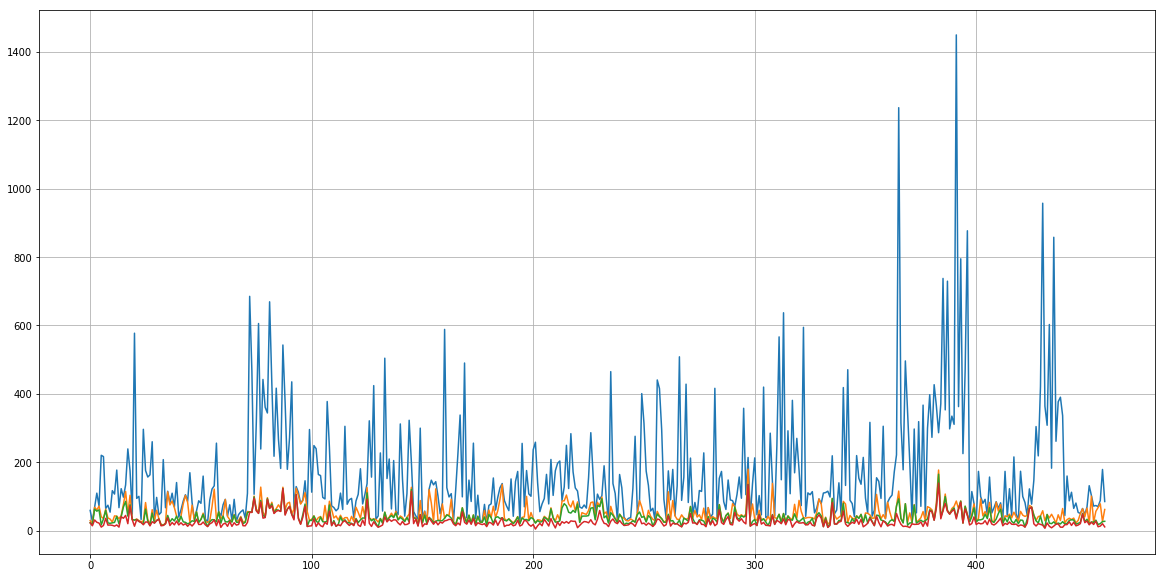

In [238]:
plt.figure(figsize=(20,10))
plt.plot(spe1)
plt.plot(spe2)
plt.plot(spe3)
plt.plot(spe4)
plt.grid()

Finally, we can show the SPE plot for each observation. SPE values for each tablet become smaller and
smaller as each successive component is added. Since each new component explains additional variance,
the size of SPE must decrease. There don’t appear to be any major outliers off the model’s plane after the
first component.

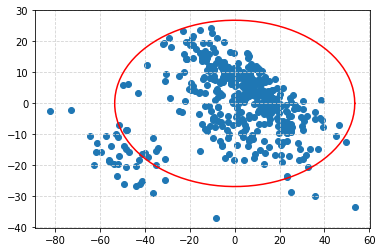

In [248]:
import scipy, random
from sklearn.preprocessing import StandardScaler
random.seed(1)
data=X
pca = PCA(n_components = 2)
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

pcaFit = pca.fit(Xstd)
dataProject = pcaFit.transform(data)

#Calculate ellipse bounds and plot with scores
theta = np.concatenate((np.linspace(-np.pi, np.pi, 50), np.linspace(np.pi, -np.pi, 50)))
circle = np.array((np.cos(theta), np.sin(theta)))
sigma = np.cov(np.array((dataProject[:, 0], dataProject[:, 1])))
ed = np.sqrt(scipy.stats.chi2.ppf(0.95, 2))
ell = np.transpose(circle).dot(np.linalg.cholesky(sigma) * ed)
a, b = np.max(ell[: ,0]), np.max(ell[: ,1]) #95% ellipse bounds
t = np.linspace(0, 2 * np.pi, 100)

plt.scatter(-dataProject[:, 0], -dataProject[:, 1])
plt.plot(a * np.cos(t), b * np.sin(t), color = 'red')
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()